# Electrical Faults Detection and Classsification

references : https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification <br>
            https://www.kaggle.com/code/sahillyraina/electric-faults-detection-classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

<img src="https://www.elprocus.com/wp-content/uploads/2014/02/Copy-of-DSCN9922.jpg" width=800 >

### What are Electrical Faults?
Normally, a power system operates under balanced conditions. When the system becomes unbalanced due to the failures of insulation at any point or due to the contact of live wires, a short–circuit or fault, is said to occur in the line. Faults may occur in the power system due to the number of reasons like natural disturbances (lightning, high-speed winds, earthquakes), insulation breakdown, falling of a tree, bird shorting, etc.


### Types of Faults?
Faults can be brodly categorised into two types:
1. Open-circuit Fault and
2. Short-Circuit Faults
    * Symmetrical and 
    * Asymmetrical Faults
    
### Symmetrical and Asymmetrical Faults
 #### Symmetrical 
 * In symmetrical faults, all phases are shorted to each other or to earth (L-L-L) or (L-L-L-G).
 * The nature of this type of fault is balanced.
 * In this type of fault,fault currents in all phases are symmetrical i.e. their magnitudes are equal and they are equally displaced by angle 120 degree.
 * It is more severe type of fault but it occurs rarely.

 #### Asymmetrical 
 * These faults involve only one or two phases.
 * In this type of fault, three phase lines become unbalanced.
 * There are mainly three types namely line to ground (L-G), line to line (L-L) and double line to ground (LL-G) faults.
 * These type of faults mostly occur on power system..





<img src="https://ars.els-cdn.com/content/image/1-s2.0-S2314717217300065-gr1.jpg" width="600" height="200"> <br>>
So here we are trying to classify Short-Circuit faults into further categories based on the values of line voltages and Line Currents.

In [2]:
ddtr = pd.read_csv("datasets/transmission_line/detect_dataset.csv")
clts = pd.read_csv("datasets/transmission_line/classData.csv")

ddtr.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [3]:
ddtr["Output (S)"].unique()

array([0, 1], dtype=int64)

In [4]:
clts.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


#### So we have two files(datasets) here namely ddtr and clts:
* ddtr is to train the model to detect any type of Flaut and<br>
* clts is for Classification of Shunt Faults.


**This file _ddtr_ contains the dataset to classify the types of fault.**<br>

 A,B,C are the 3-phases of the electrical system. Most of the Electricity transmission happens via 3-phase system,<br>
and hence **Ia** represents the current(I) in phase A, **Va** represents the Voltage(V) in phase A and so on for Phase A and B.

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]<br>
Outputs - [G C B A]<br>

Examples :<br>
[0 0 0 0] - No Fault<br>
[1 0 0 1] - LG fault (Between Phase A and Gnd)<br>
[0 0 1 1] - LL fault (Between Phase A and Phase B)<br>
[1 0 1 1] - LLG Fault (Between Phases A,B and ground)<br>
[0 1 1 1] - LLL Fault(Between all three phases)<br>
[1 1 1 1] - LLLG fault( Three phase symmetrical fault)<br>

In [5]:
# DDTR
print(f"The Detect Dataset has {ddtr.shape[0]} rows and {ddtr.shape[1]} columns.")
# CLTS
print(f"The Dataset to be classified has {clts.shape[0]} rows and {clts.shape[1]} columns.")

The Detect Dataset has 12001 rows and 9 columns.
The Dataset to be classified has 7861 rows and 10 columns.


In [6]:
# Dropping the last 2 columns from ddtr dataset.
ddtr = ddtr.drop(['Unnamed: 7', 'Unnamed: 8'],axis=1)
ddtr.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


### Lets have a quick look on data types and values of our dataset 

In [7]:
ddtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [8]:
clts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


We don't have any type of null values in our dataset.

In [9]:
ddtr.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [10]:
clts.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


If there is any confusion regarding the values of the Line voltages, then let me clarify it that they are most probably in p.u.<br>
i.e.<br>
 ## $V_{p.u.} = \frac{V}{V_{base}} $

In actual the power system consists of 4 generators of 11 × 10^3 V. so we can convert by multiplying them by $11000$ Volts provided they have taken 11k as their base.

.........too much of info!

In [11]:
print(f"Dataset Detect has {ddtr.duplicated().sum()} duplicate values.")
print(f"Dataset Classify has {clts.duplicated().sum()} duplicate values.")

Dataset Detect has 0 duplicate values.
Dataset Classify has 0 duplicate values.


0    6505
1    5496
Name: Output (S), dtype: int64 



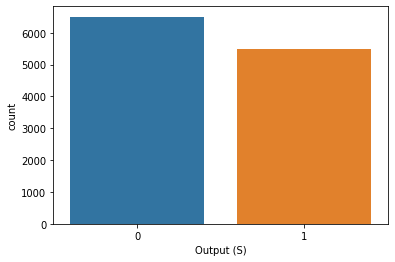

In [12]:
print(ddtr['Output (S)'].value_counts(),"\n")
sns.countplot(x=ddtr['Output (S)'])
plt.show()

We have a balanced dataset.

In [13]:
ddtr.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

For Current Ia



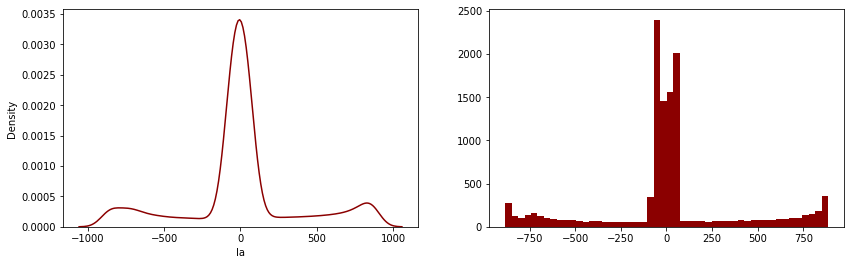

For Current Ib



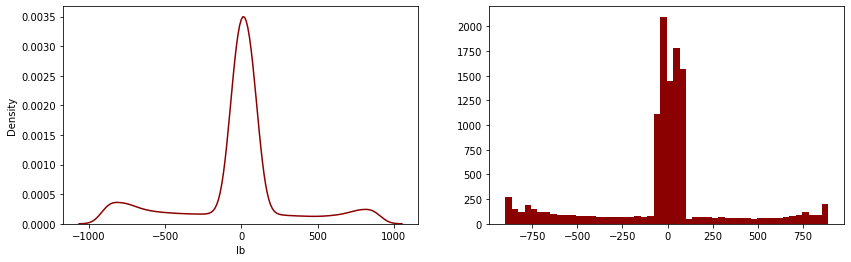

For Current Ic



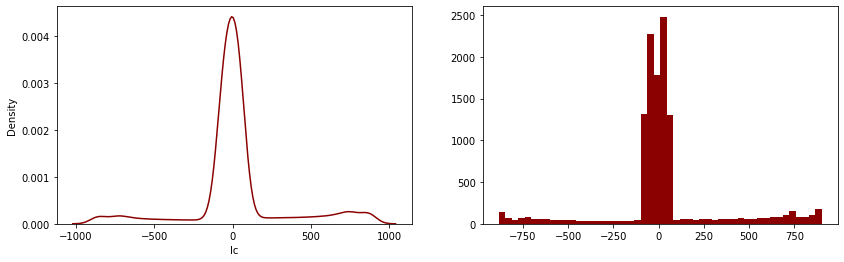

In [14]:
for i,j in enumerate(ddtr.columns[1:4]):
    
    print(f"For Current {j}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=ddtr[j],color='darkred')

    plt.subplot(122)
    plt.hist(x=ddtr[j], color='darkred', bins=50)
    plt.show()

For Voltage Va



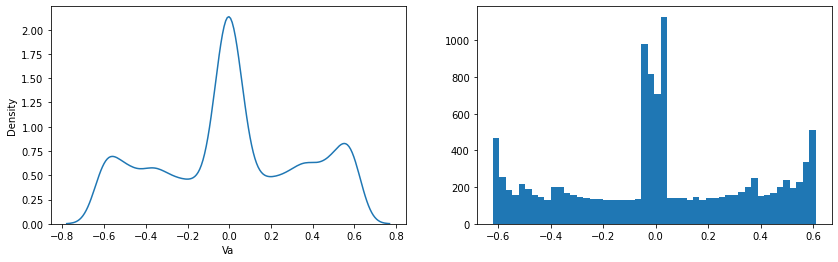

For Voltage Vb



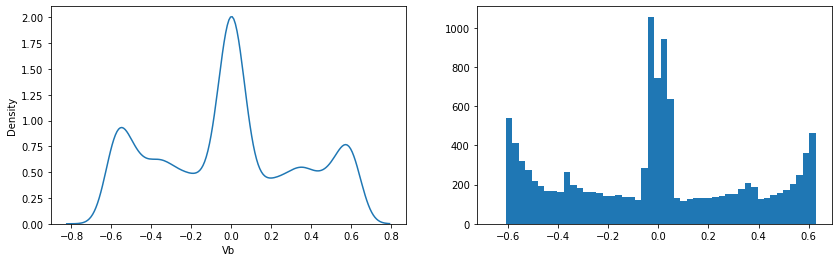

For Voltage Vc



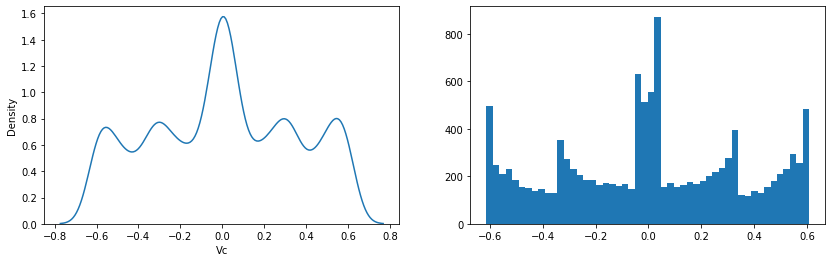

In [15]:
for i,j in enumerate(ddtr.columns[4:]):
    
    print(f"For Voltage {j}\n")
    plt.subplots(1,2,figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x=ddtr[j])

    plt.subplot(122)
    plt.hist(x=ddtr[j], bins= 50)
    plt.show()

For Line A



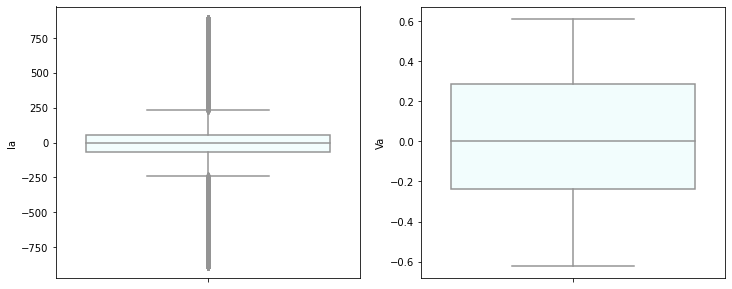

For Line B



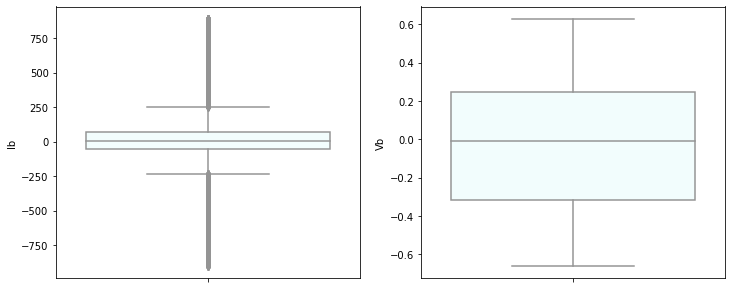

For Line C



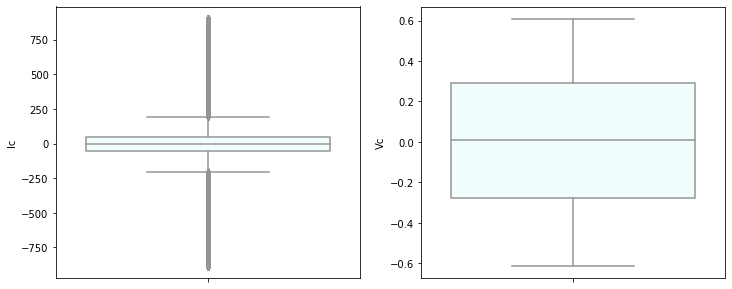

In [16]:
for i,j in zip(ddtr.columns[1:4],ddtr.columns[4:]):    
    plt.subplots(1,2,figsize=(12,5))
    print(f"For Line {str(i)[1].upper()}\n")
    plt.subplot(121)
    sns.boxplot(y=ddtr[i],color='azure')

    plt.subplot(122)
    sns.boxplot(y=ddtr[j],color='azure')
    plt.show()

All the data is somewhat normally distrubuted.

In [17]:
fig = px.line(ddtr, x = "Ia", y = "Va", title="For Line A", color = "Output (S)")
fig.show()


In [18]:
fig = px.line(ddtr, x = "Ib", y = "Vb", title="For Line B", color = "Output (S)")
fig.show()

In [19]:
fig = px.line(ddtr, x = "Ic", y = "Vc",title="For Line C",  color = "Output (S)")
fig.show()

#### We can observe that:
* Normally the Line current varies from **-100 to 100 Amp** and Voltage p.u. between **-0.6 and 0.6**.
* While during fault, we notice some absurd and random behaviour and the value of Line current even touches **-/+800 Amp** mark.

#### Classification Dataset

In [20]:
clts['fault_types'] = clts['G'].astype('str') + clts['C'].astype('str') + clts['B'].astype('str') + clts['A'].astype('str')
clts.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_types
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


[G C B A]
[0 0 0 0] - No fault 
[1 0 0 1] - LG fault
[0 1 1 0] - LL fault
[1 0 1 1] - LLG Fault
[0 1 1 1] - LLL Fault
[1 1 1 1] - LLLG fault



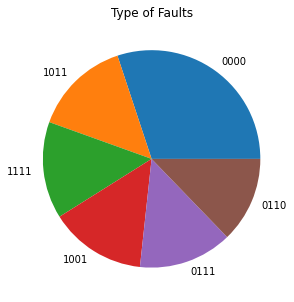

In [21]:
print("[G C B A]\n[0 0 0 0] - No fault \n[1 0 0 1] - LG fault\n[0 1 1 0] - LL fault\n[1 0 1 1] - LLG Fault\n[0 1 1 1] - LLL Fault\n[1 1 1 1] - LLLG fault\n")
plt.figure(figsize=(8,5))
clts.fault_types.value_counts().plot.pie()
plt.title("Type of Faults")
plt.ylabel("")
plt.show()

In [22]:
NF = clts[clts['fault_types']=='0000']
LG = clts[clts['fault_types']=='1001'] 
LL = clts[clts['fault_types']=='0110'] 
LLG = clts[clts['fault_types']=='1011'] 
LLL = clts[clts['fault_types']=='0111'] 
LLLG = clts[clts['fault_types']=='1111']

For No Fault


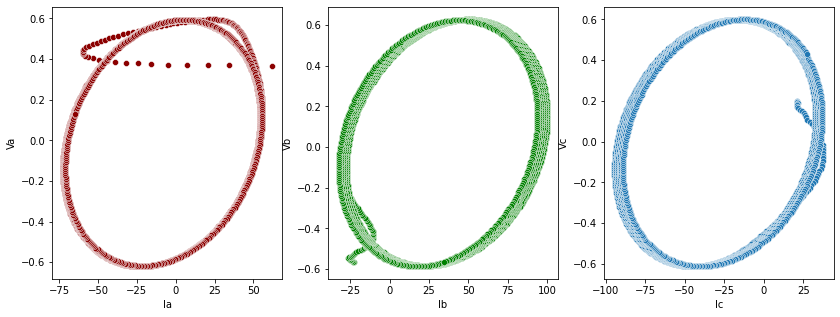

In [23]:
print("For No Fault")
plt.subplots(1,3,figsize=(14,5))
plt.subplot(131)
sns.scatterplot(x=NF['Ia'],y=NF['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=NF['Ib'],y=NF['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=NF['Ic'],y=NF['Vc'])

# plt.tight_layout()
plt.show()

For Line Ground Fault

Since the fault has occured between Phase A and Ground we can notice the amount of current flowing in line A 
which is alomst 10 times the normal operating current.


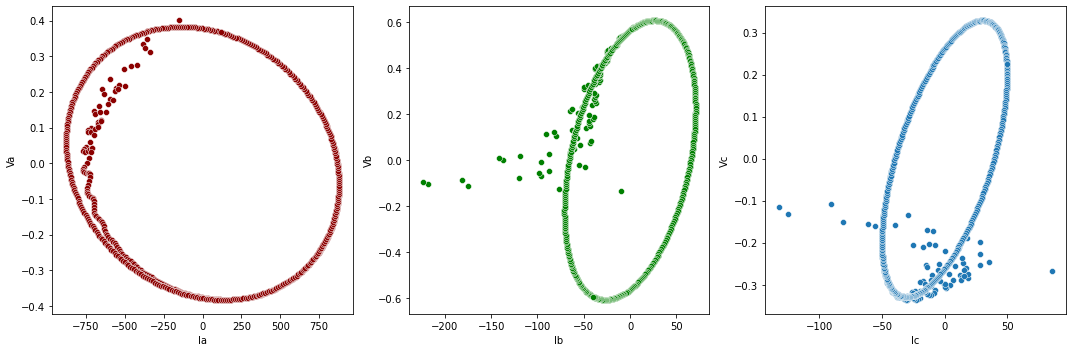

In [24]:
print("For Line Ground Fault\n\nSince the fault has occured between Phase A and Ground we can notice the amount of current flowing in line A \nwhich is alomst 10 times the normal operating current.")
plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
sns.scatterplot(x=LG['Ia'],y=LG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LG['Ib'],y=LG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LG['Ic'],y=LG['Vc'])

plt.tight_layout()
plt.show()

For Line to Line Fault


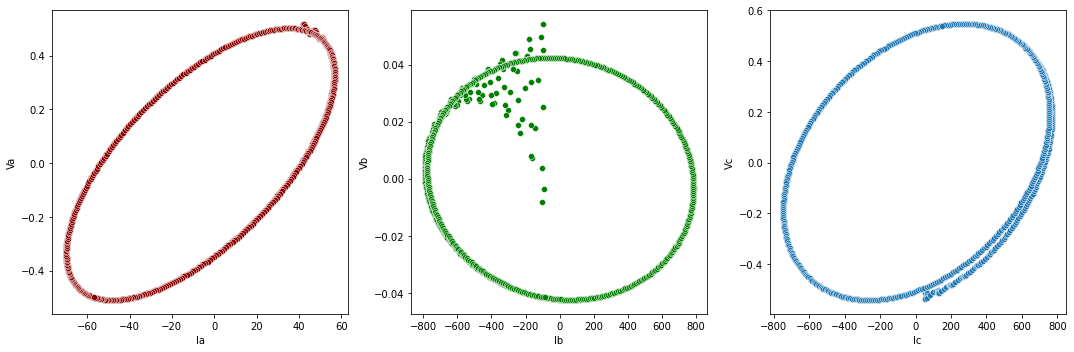

In [25]:
print("For Line to Line Fault")
plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
sns.scatterplot(x=LL['Ia'],y=LL['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LL['Ib'],y=LL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LL['Ic'],y=LL['Vc'])

plt.tight_layout()
plt.show()

For Line Line Ground Fault


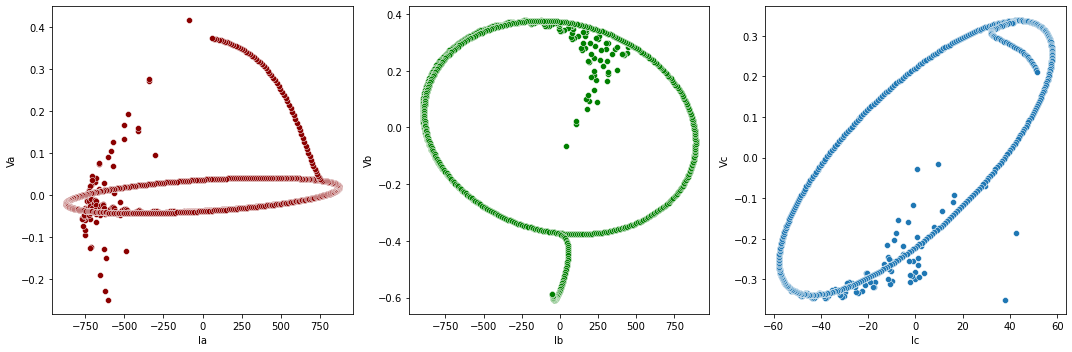

In [26]:
print("For Line Line Ground Fault")
plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
sns.scatterplot(x=LLG['Ia'],y=LLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLG['Ib'],y=LLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLG['Ic'],y=LLG['Vc'])

plt.tight_layout()
plt.show()

For Line Line Line Fault


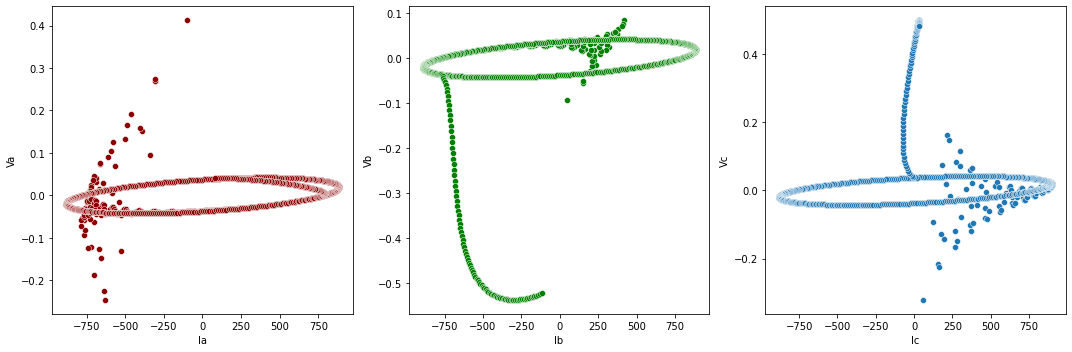

In [27]:
print("For Line Line Line Fault")
plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
sns.scatterplot(x=LLL['Ia'],y=LLL['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLL['Ib'],y=LLL['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLL['Ic'],y=LLL['Vc'])

plt.tight_layout()
plt.show()

For Line Line Line Ground Fault


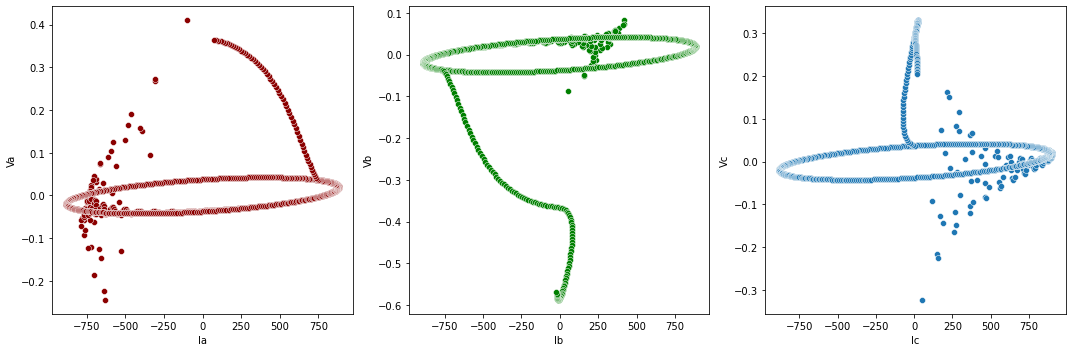

In [28]:
print("For Line Line Line Ground Fault")
plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
sns.scatterplot(x=LLLG['Ia'],y=LLLG['Va'],color='darkred')

plt.subplot(132)
sns.scatterplot(x=LLLG['Ib'],y=LLLG['Vb'],color='green')

plt.subplot(133)
sns.scatterplot(x=LLLG['Ic'],y=LLLG['Vc'])

plt.tight_layout()
plt.show()

In [29]:
df_detect_corr = ddtr[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].corr()
df_corr_round = df_detect_corr.round(3)
fig = ff.create_annotated_heatmap(
            z=df_detect_corr.to_numpy(),
            x=df_detect_corr.columns.tolist(),
            y=df_detect_corr.index.tolist(),
            zmax=1, zmin=-1,
            showscale=True,
            hoverongaps=True,
            colorscale='rdpu', 
            annotation_text=df_corr_round.to_numpy()
            )

fig.update_layout(title_text='<b>Correlation Heatmap</b>')
fig.show()

From above diagram we can see that the features doest not have positive corelation

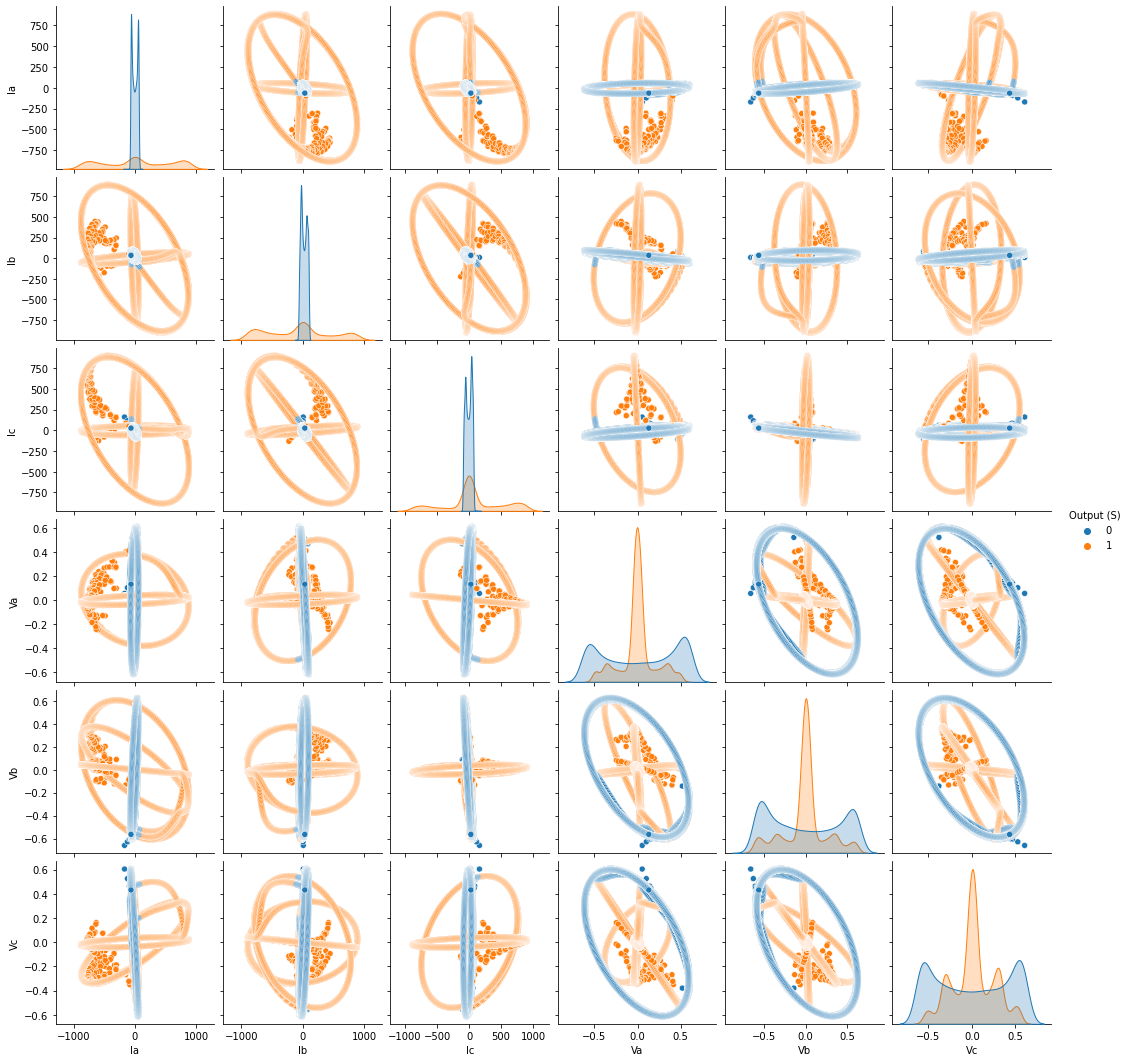

In [30]:
sns.pairplot(ddtr,hue='Output (S)')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

from sklearn import metrics

## Detection dataset

In [32]:
for i in ['Va','Vb','Vc']:
    ddtr[i] = ddtr[i]*11000
    
ddtr.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,599.390044,-7259.130241,6659.740208
1,0,-122.235754,6.168667,116.067087,1122.000000,-6914.727017,5788.217479
2,0,-90.161474,3.813632,86.347841,1551.280808,-6658.045449,5106.764641
3,0,-79.904916,2.398803,77.506112,1718.997027,-6624.588641,4905.591614
4,0,-63.885255,0.590667,63.294587,1984.966313,-6506.515664,4521.549351


In [33]:
dip = ddtr.drop(columns=['Output (S)'],axis=1)
dipc = dip.columns

mms = MinMaxScaler()
df_dip = mms.fit_transform(dip)

dip = pd.DataFrame(df_dip, columns=dipc)

In [34]:
dop = ddtr.iloc[:,0]

In [35]:
dip.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.503171,0.488143,0.507506,0.512969,0.500408,0.505908
std,0.213170,0.199653,0.169252,0.281340,0.277718,0.286065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.463009,0.474255,0.464407,0.311339,0.268831,0.273359
50%,0.497548,0.505608,0.494757,0.506426,0.506857,0.508694
75%,0.529800,0.541872,0.520349,0.736078,0.705548,0.739087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dip, dop, test_size=0.25, random_state=67)

### SVM model

Score: 0.9969999999999999


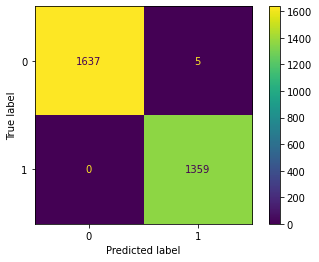

In [38]:
sv = SVC(C=1000)

sv.fit(X_train,y_train)
scores = cross_val_score(sv, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
# metrics.plot_confusion_matrix(sv,X_test,y_test)
y_pred = sv.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Decision Tree Model

Score: 0.9940000000000001 



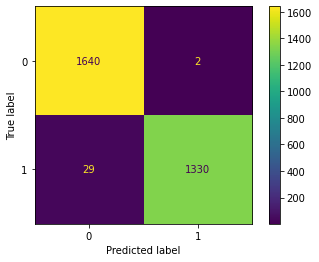

In [39]:
dtc = DecisionTreeClassifier(criterion='gini',ccp_alpha=0.0012)

dtc.fit(X_train,y_train)
scores = cross_val_score(dtc, X_test, y_test, cv=10)
print("Score:", np.mean(scores),"\n")
# metrics.plot_confusion_matrix(dtc,X_test,y_test)
y_pred = dtc.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Value *ccp_alpha* has been calculated via decision tree pruning.

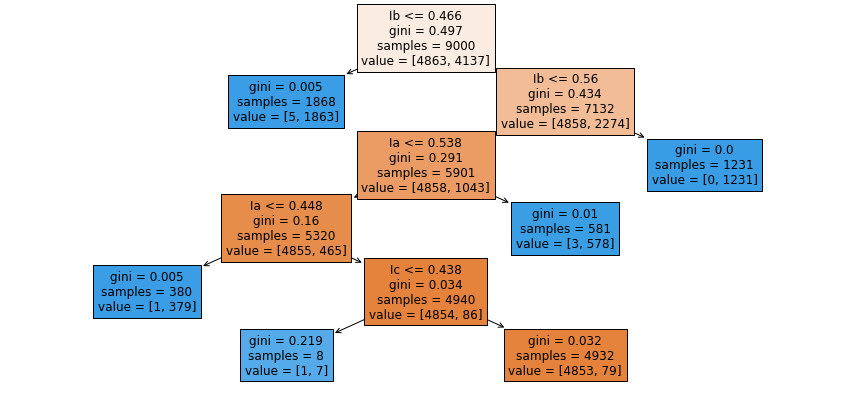

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(dtc,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

### KNN Model

Value of hyperparameters has been evaluated using GridSearchCV

Score: 0.9956666666666667 



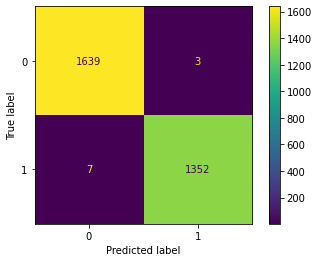

In [41]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 5,p= 1)
knn.fit(X_train,y_train)
scores = cross_val_score(knn, X_test, y_test, cv=10)
print("Score:", np.mean(scores),"\n")
# metrics.plot_confusion_matrix(knn,X_test,y_test)
y_pred = knn.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### Random Forest Classifier

In [42]:
# n_estimators = [10,20,30,40,50,60]
# max_features = ['auto','sqrt']
# max_depth = [3,4,5,6]
# min_samples_split = [5,10,15]
# min_samples_leaf = [5,10]

# param_grid = {"n_estimators": n_estimators,
#             "max_features": max_features,
#             "max_depth": max_depth,
#             "min_samples_split":min_samples_split,
#             "min_samples_leaf":min_samples_leaf}

# rf_grid=GridSearchCV(RandomForestClassifier() ,param_grid=param_grid,verbose=2,n_jobs=4)
# rf_grid.fit(X_train,y_train)

# rf_grid.best_params_

# rf_grid.best_estimator_

In [43]:
rfclf = RandomForestClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=15,n_estimators=10)
rfclf.fit(X_train,y_train)
scores=cross_val_score(rfclf, X_test, y_test, cv=10)
print("Score:", np.mean(scores),"\n")

Score: 0.9899999999999999 



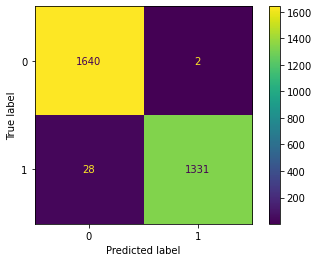

In [44]:
# metrics.plot_confusion_matrix(rfclf,X_test,y_test)
y_pred = rfclf.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### SVM is doing  a great job till now in Fault Detection, than the rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it.